In [76]:
import numpy as np 
from numpy import pi as π
import matplotlib.pyplot as plt 
from scipy.constants import epsilon_0
from numba import njit

@njit
def epot4lines(r, L, rho_l, N, a):
    V = 0
    dl = L/N
    for i in range(int(-N/2), int(N/2 + dl)):
        r1 = np.array([a,i*dl,0])
        r2 = np.array([-a,i*dl,0])
        r3 = np.array([i*dl,a,0])
        r4 = np.array([i*dl,-a,0])
        R1 = np.linalg.norm(r - r1)
        R2 = np.linalg.norm(r - r2)
        R3 = np.linalg.norm(r - r3)
        R4 = np.linalg.norm(r - r4)
        dV1 = dl*rho_l / (4*π*epsilon_0*(R1))
        dV2 = dl*rho_l / (4*π*epsilon_0*(R2))
        dV3 = dl*rho_l / (4*π*epsilon_0*(R3))
        dV4 = dl*rho_l / (4*π*epsilon_0*(R4))
        V += dV1 + dV2 + dV3 + dV4
    return V


def efield4lines(r, L, rho_l, N, a):
    E = np.array([0,0,0], dtype = float)
    dl = L/N
    for i in range(int(-N/2), int(N/2 + dl)):
        r1 = np.array([a,i*dl,0])
        r2 = np.array([-a,i*dl,0])
        r3 = np.array([i*dl,a,0])
        r4 = np.array([i*dl,-a,0])
        R1 = r - r1
        R2 = r - r2
        R3 = r - r3
        R4 = r - r4
        R1_norm = np.linalg.norm(R1)
        R2_norm = np.linalg.norm(R2)
        R3_norm = np.linalg.norm(R3)
        R4_norm = np.linalg.norm(R4)
        
        k = dl*rho_l / (4*π*epsilon_0)
        dE1 = R1/R1_norm**3
        dE2 = R2/R2_norm**3
        dE3 = R3/R3_norm**3
        dE4 = R4/R4_norm**3
        E += k*(dE1 + dE2 + dE3 + dE4)
    
    return E

def AnalPot(z,a, rho_l, L):
    return rho_l*L/(np.pi*epsilon_0)* np.arcsinh(a/np.sqrt(a**2 + z**2))

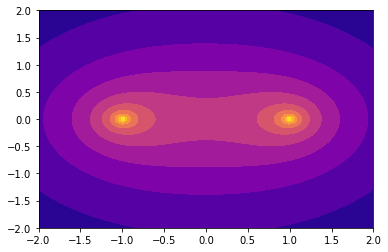

In [55]:
N = 100
L = 2
y = np.linspace(-L, L, N)
z = np.linspace(-L, L, N)
ry, rz = np.meshgrid(y,z)
rho_l = 1
a = 1
V = np.zeros((N,N))

for i in range(len(V.flat)):
   r = np.array([0, ry.flat[i], rz.flat[i]])
   V.flat[i] = epot4lines(r, L, rho_l, N, a)
   
plt.contourf(ry, rz, V, 10, cmap = 'plasma')

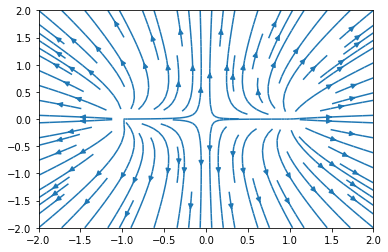

In [49]:
N = 50
L = 2
y = np.linspace(-L, L, N)
z = np.linspace(-L, L, N)
ry, rz = np.meshgrid(y,z)
Ey, Ez = np.zeros((N,N)), np.zeros((N,N))
rho_l = 1
a = 1

for i in range(len(Ey.flat)):
   r = np.array([0, ry.flat[i], rz.flat[i]])
   field = efield4lines(r, L, rho_l, N, a)
   Ey.flat[i], Ez.flat[i] = field[1], field[2]
   
plt.streamplot(ry,rz,Ey,Ez)
plt.show()

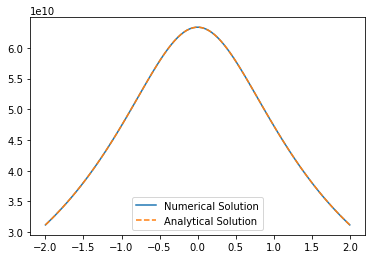

In [77]:
Vz = V[:,int(N/2)]
z = np.linspace(-L,L,N)
VzAnal = AnalPot(z,a, rho_l, L)
plt.plot(z,Vz, label = "Numerical Solution")
plt.plot(z,VzAnal, label = "Analytical Solution", linestyle = "--")
plt.legend()

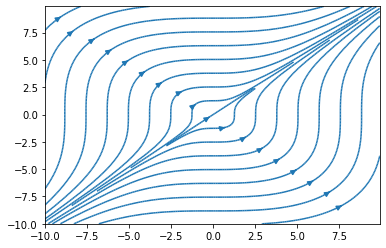

In [46]:
import numpy as np
import matplotlib.pyplot as plt
Y,X = np.mgrid[-10:10:.1, -10:10:.1]
y,x = Y[:,0], X[0,:]
U, V = Y**2, X**2
stream_points = np.array(list(zip(np.arange(-9,9,1), -np.arange(-9,9,1))))
plt.streamplot(x,y, U,V, start_points=stream_points, density=5, broken_streamlines=False )

In [63]:
print(VzAnal)

[0.46364761 0.47186098 0.48034752 0.48911981 0.4981911  0.50757538
 0.51728738 0.52734265 0.53775757 0.5485494  0.55973632 0.57133748
 0.58337301 0.59586408 0.60883292 0.62230287 0.63629835 0.65084492
 0.66596924 0.68169908 0.69806328 0.7150917  0.7328151  0.75126508
 0.7704739  0.79047426 0.81129911 0.83298127 0.85555311 0.87904609
 0.90349019 0.92891334 0.95534067 0.98279372 1.01128957 1.04083982
 1.07144961 1.10311648 1.13582938 1.16956753 1.20429954 1.23998258
 1.27656176 1.31396988 1.35212738 1.39094283 1.4303137  1.47012767
 1.51026431 1.55059705 1.55059705 1.51026431 1.47012767 1.4303137
 1.39094283 1.35212738 1.31396988 1.27656176 1.23998258 1.20429954
 1.16956753 1.13582938 1.10311648 1.07144961 1.04083982 1.01128957
 0.98279372 0.95534067 0.92891334 0.90349019 0.87904609 0.85555311
 0.83298127 0.81129911 0.79047426 0.7704739  0.75126508 0.7328151
 0.7150917  0.69806328 0.68169908 0.66596924 0.65084492 0.63629835
 0.62230287 0.60883292 0.59586408 0.58337301 0.57133748 0.559736

TypeError: streamplot() got an unexpected keyword argument 'broken_streamlines'

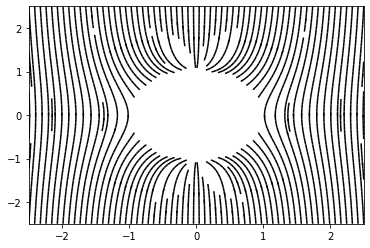

In [81]:
mask = np.sqrt(X**2+Z**2)<1

BX_OUT = Bx.copy()
BZ_OUT = Bz.copy()
BX_OUT[mask] = None
BZ_OUT[mask] = None
plt.streamplot(X, Z, BX_OUT, BZ_OUT, color='k', 
               arrowstyle='-', density=2, broken_streamlines = False)

BX_IN = Bx.copy()
BZ_IN = Bz.copy()
BX_IN[~mask] = None
BZ_IN[~mask] = None
plt.streamplot(X, Z, BX_IN, BZ_IN, color='r', 
               arrowstyle='-', density=2, broken_streamlines = False)

In [79]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def cart2spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z/r)
    if r == 0:
        theta = 0
    return (r, theta, phi)

def S(theta, phi):
    S = np.array([[np.sin(theta)*np.cos(phi), np.cos(theta)*np.cos(phi), -np.sin(phi)],
                  [np.sin(theta)*np.sin(phi), np.cos(theta)*np.sin(phi),  np.cos(phi)],
                  [np.cos(theta),             -np.sin(theta),             0]])
    return S

def computeB(r, theta, phi, a=1, muR=100, B0=1):
    delta = (muR - 1)/(muR + 2)
    if r > a:
        Bspherical = B0*np.array([np.cos(theta) * (1 + 2*delta*a**3 / r**3),
                                  np.sin(theta) * (delta*a**3 / r**3 - 1),
                                  0])
        B = np.dot(S(theta, phi), Bspherical)
    else:
        B = 3*B0*(muR / (muR + 2)) * np.array([0, 0, 1])
    return B

Z, X = np.mgrid[-2.5:2.5:1000j, -2.5:2.5:1000j]
Bx = np.zeros(np.shape(X))
Bz = np.zeros(np.shape(X))
Babs = np.zeros(np.shape(X))
for i in range(len(X)):
    for j in range(len(Z)):
        r, theta, phi = cart2spherical(X[0, i], 0, Z[j, 0])
        B = computeB(r, theta, phi)
        Bx[i, j], Bz[i, j] = B[0], B[2]
        Babs[i, j] = np.sqrt(B[0]**2 + B[1]**2 + B[2]**2)
